In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
df = pd.read_csv('stock_data.csv')
df

,short_name,name,sector,last,change_per,change_price,recommendation,vol,mrkt_cap
0,SPCB,SUPERCOM LTD NEW,Electronic Technology,2.24,54.482759,0.79,0.466667,145696313,4.208691e+07
1,CLVS,CLOVIS ONCOLOGY INC,Health Technology,7.86,47.744361,2.54,0.466667,331757039,8.216058e+08
2,HOFV,HALL OF FAME RESORT & ENTMT COMPANY,Consumer Services,4.00,46.520147,1.27,0.461538,201578170,3.331384e+08
3,FHTX,FOGHORN THERAPEUTICS INC,Health Technology,16.12,36.610169,4.32,0.230769,475044,5.934852e+08
4,SNES,SENESTECH INC,Health Technology,2.27,35.119048,0.59,0.445455,76166085,1.922320e+07
...,...,...,...,...,...,...,...,...,...
95,PD,PAGERDUTY INC,Technology Services,41.18,9.637913,3.62,-0.112121,2420446,3.373993e+09
96,IGMS,IGM BIOSCIENCES INC,Health Technology,91.10,9.587393,7.97,0.333333,495467,2.908076e+09
97,NOG,NORTHERN OIL & GAS INC (NEV),Energy Minerals,13.76,9.554140,1.20,0.309091,5018223,8.313957e+08
98,SUNW,SUNWORKS INC,Producer Manufacturing,14.46,9.545455,1.26,0.287879,4434711,3.446584e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   short_name      100 non-null    object 
 1   name            100 non-null    object 
 2   sector          100 non-null    object 
 3   last            100 non-null    float64
 4   change_per      100 non-null    float64
 5   change_price    100 non-null    float64
 6   recommendation  98 non-null     float64
 7   vol             100 non-null    int64  
 8   mrkt_cap        98 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 7.2+ KB


### Issues:
- Recommendations are numeric values. 
- Company names are capitalized.

In [4]:
df['rec'] = 'holder'
df

,short_name,name,sector,last,change_per,change_price,recommendation,vol,mrkt_cap,rec
0,SPCB,SUPERCOM LTD NEW,Electronic Technology,2.24,54.482759,0.79,0.466667,145696313,4.208691e+07,holder
1,CLVS,CLOVIS ONCOLOGY INC,Health Technology,7.86,47.744361,2.54,0.466667,331757039,8.216058e+08,holder
2,HOFV,HALL OF FAME RESORT & ENTMT COMPANY,Consumer Services,4.00,46.520147,1.27,0.461538,201578170,3.331384e+08,holder
3,FHTX,FOGHORN THERAPEUTICS INC,Health Technology,16.12,36.610169,4.32,0.230769,475044,5.934852e+08,holder
4,SNES,SENESTECH INC,Health Technology,2.27,35.119048,0.59,0.445455,76166085,1.922320e+07,holder
...,...,...,...,...,...,...,...,...,...,...
95,PD,PAGERDUTY INC,Technology Services,41.18,9.637913,3.62,-0.112121,2420446,3.373993e+09,holder
96,IGMS,IGM BIOSCIENCES INC,Health Technology,91.10,9.587393,7.97,0.333333,495467,2.908076e+09,holder
97,NOG,NORTHERN OIL & GAS INC (NEV),Energy Minerals,13.76,9.554140,1.20,0.309091,5018223,8.313957e+08,holder
98,SUNW,SUNWORKS INC,Producer Manufacturing,14.46,9.545455,1.26,0.287879,4434711,3.446584e+08,holder


In [5]:
df.rec.loc[df.recommendation < 0] = 'sell'
df.rec.loc[df.recommendation >= 0.5] = 'strong_buy'
df.rec.loc[df.recommendation == 0] = 'neutral'
df.rec.loc[df.rec == 'holder'] = 'buy'


C:\Users\MSI2018\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\MSI2018\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\MSI2018\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [6]:
df.drop('recommendation', axis=1, inplace=True)
df.rename({'rec':'recommendation'}, axis=1, inplace=True)
df

,short_name,name,sector,last,change_per,change_price,vol,mrkt_cap,recommendation
0,SPCB,SUPERCOM LTD NEW,Electronic Technology,2.24,54.482759,0.79,145696313,4.208691e+07,buy
1,CLVS,CLOVIS ONCOLOGY INC,Health Technology,7.86,47.744361,2.54,331757039,8.216058e+08,buy
2,HOFV,HALL OF FAME RESORT & ENTMT COMPANY,Consumer Services,4.00,46.520147,1.27,201578170,3.331384e+08,buy
3,FHTX,FOGHORN THERAPEUTICS INC,Health Technology,16.12,36.610169,4.32,475044,5.934852e+08,buy
4,SNES,SENESTECH INC,Health Technology,2.27,35.119048,0.59,76166085,1.922320e+07,buy
...,...,...,...,...,...,...,...,...,...
95,PD,PAGERDUTY INC,Technology Services,41.18,9.637913,3.62,2420446,3.373993e+09,sell
96,IGMS,IGM BIOSCIENCES INC,Health Technology,91.10,9.587393,7.97,495467,2.908076e+09,buy
97,NOG,NORTHERN OIL & GAS INC (NEV),Energy Minerals,13.76,9.554140,1.20,5018223,8.313957e+08,buy
98,SUNW,SUNWORKS INC,Producer Manufacturing,14.46,9.545455,1.26,4434711,3.446584e+08,buy


In [7]:
df.recommendation.value_counts()

buy           61
strong_buy    27
sell          11
neutral        1
Name: recommendation, dtype: int64

In [8]:
df.name = df.name.apply(lambda x: x.lower().title())
df

,short_name,name,sector,last,change_per,change_price,vol,mrkt_cap,recommendation
0,SPCB,Supercom Ltd New,Electronic Technology,2.24,54.482759,0.79,145696313,4.208691e+07,buy
1,CLVS,Clovis Oncology Inc,Health Technology,7.86,47.744361,2.54,331757039,8.216058e+08,buy
2,HOFV,Hall Of Fame Resort & Entmt Company,Consumer Services,4.00,46.520147,1.27,201578170,3.331384e+08,buy
3,FHTX,Foghorn Therapeutics Inc,Health Technology,16.12,36.610169,4.32,475044,5.934852e+08,buy
4,SNES,Senestech Inc,Health Technology,2.27,35.119048,0.59,76166085,1.922320e+07,buy
...,...,...,...,...,...,...,...,...,...
95,PD,Pagerduty Inc,Technology Services,41.18,9.637913,3.62,2420446,3.373993e+09,sell
96,IGMS,Igm Biosciences Inc,Health Technology,91.10,9.587393,7.97,495467,2.908076e+09,buy
97,NOG,Northern Oil & Gas Inc (Nev),Energy Minerals,13.76,9.554140,1.20,5018223,8.313957e+08,buy
98,SUNW,Sunworks Inc,Producer Manufacturing,14.46,9.545455,1.26,4434711,3.446584e+08,buy


In [9]:
df.to_csv('stock_data_clean.csv', index=False)

In [15]:
sec_dic = dict(df.sector.value_counts()[:5])

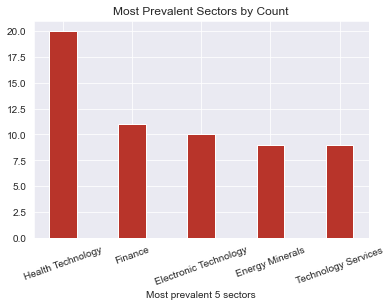

In [21]:
%matplotlib inline

sns.set_style('darkgrid')

plt.bar(sec_dic.keys(), sec_dic.values(), width=0.4, color='#b8342a')

plt.xticks(rotation=20)
plt.xlabel('Most prevalent 5 sectors')
plt.title('Most Prevalent Sectors by Count')
plt.show()